Logistic Regression Accuracy: 0.8005
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

Random Forest Accuracy: 0.8665
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Gradient Boosting Accuracy: 0.8675
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1 

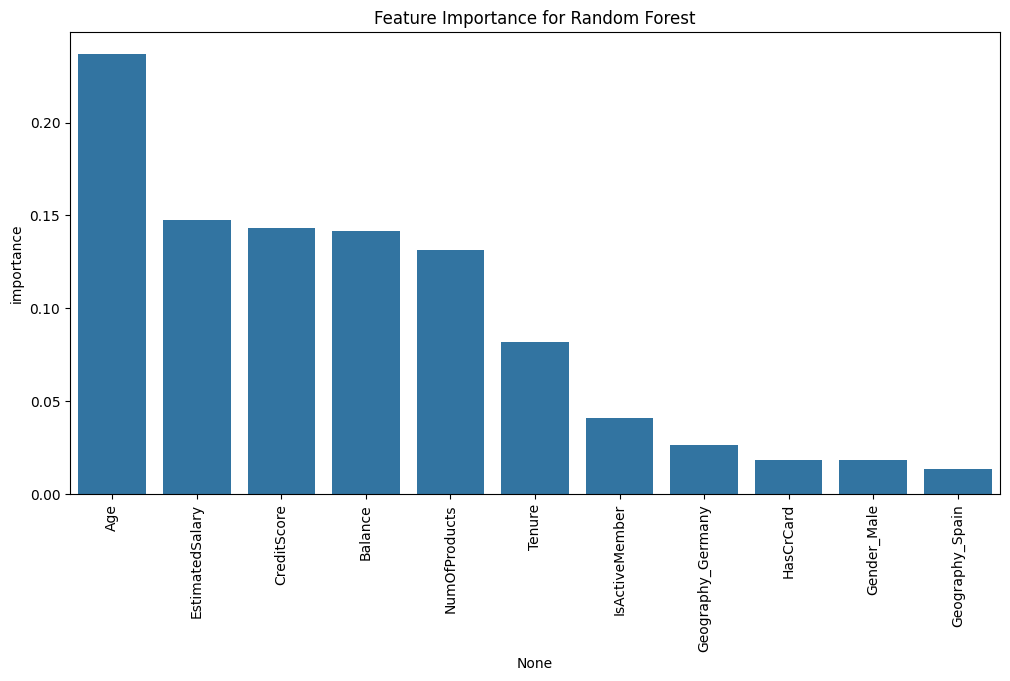

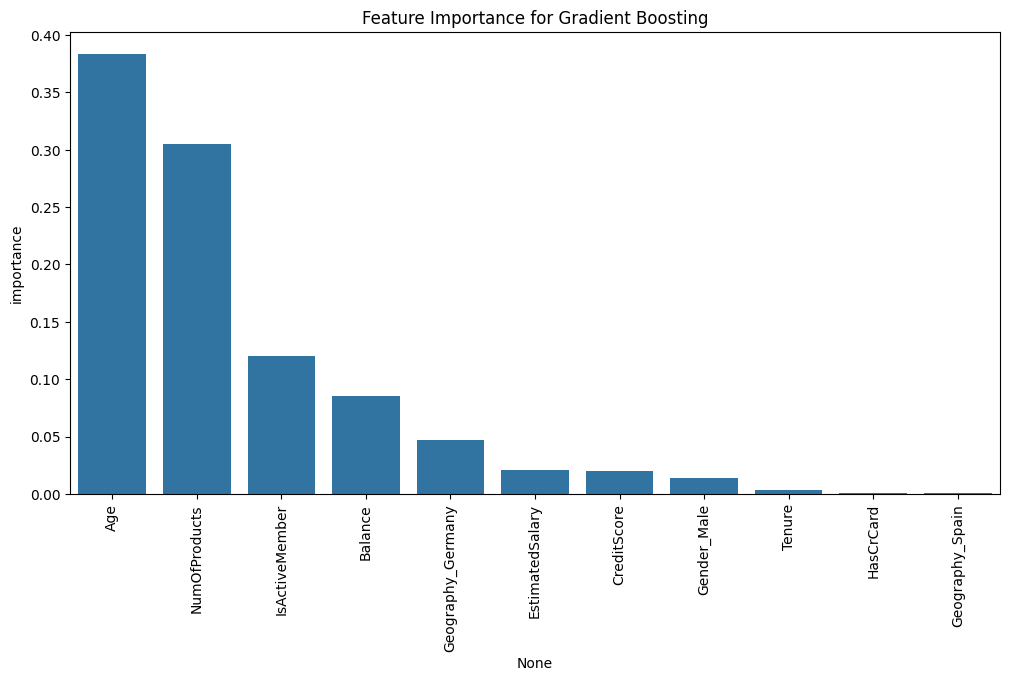

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'Churn_Modelling[1].csv'
df = pd.read_csv(file_path)

# Drop unnecessary columns
df_encoded = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Encode categorical variables
df_encoded = pd.get_dummies(df_encoded, columns=['Geography', 'Gender'], drop_first=True)

# Split the data into features and target variable
X = df_encoded.drop(columns=['Exited'])
y = df_encoded['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boost = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the models
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boost.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_gradient_boost = gradient_boost.predict(X_test)

# Evaluate the models
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_gradient_boost = accuracy_score(y_test, y_pred_gradient_boost)

log_reg_report = classification_report(y_test, y_pred_log_reg)
random_forest_report = classification_report(y_test, y_pred_random_forest)
gradient_boost_report = classification_report(y_test, y_pred_gradient_boost)

print(f'Logistic Regression Accuracy: {accuracy_log_reg}')
print('Logistic Regression Classification Report:')
print(log_reg_report)

print(f'Random Forest Accuracy: {accuracy_random_forest}')
print('Random Forest Classification Report:')
print(random_forest_report)

print(f'Gradient Boosting Accuracy: {accuracy_gradient_boost}')
print('Gradient Boosting Classification Report:')
print(gradient_boost_report)

# Feature Importance for Random Forest
feature_importances_rf = pd.DataFrame(random_forest.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importance for Random Forest:")
print(feature_importances_rf)

# Feature Importance for Gradient Boosting
feature_importances_gb = pd.DataFrame(gradient_boost.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importance for Gradient Boosting:")
print(feature_importances_gb)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances_rf.index, y=feature_importances_rf['importance'])
plt.title('Feature Importance for Random Forest')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances_gb.index, y=feature_importances_gb['importance'])
plt.title('Feature Importance for Gradient Boosting')
plt.xticks(rotation=90)
plt.show()
